<a href="https://colab.research.google.com/github/RodrigodeFeo/8DTS/blob/main/Trabalho_DL_FIAP_8DTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Considerações importantes:**
**Oi Prof Felipe! Antes de iniciar a revisão do trabalho, precisamos te passar como funciona a estrutura deste script.**

**- As sessões 1 a 6 mostram como o script foi criado e o passo a passo da análise.**

**- Para efeito de praticidade, concatenamos tudo em uma única função na sessão 7, para podermos comparar os resultados de cada ação ao fim.**

**- Resultados finais estão nas sessoes 8, 9, 10 e 11**
  - 8) BB
  - 9) CSN
  - 10) PETR
  - 11) VALE

# **Resumo dos resultados:**

# **BB**

1) Melhor NN (medido pelo retorno financeiro) --> RNN

2) RNN mostrou maior acurácia e menor Loss. Recall também é maior que CNN. CNN somente ficou com precisão maior

3) Retorno da CNN nos últimos 15 dias: $190.68

4) Retorno da RNN nos últimos 15 dias: $221.63

# **CSN**

1) Melhor NN (medido pelo retorno financeiro) --> CNN

2) CNN mostrou menor Loss e maior Precisão e Recall. RNN teve maior acurácia

3) Retorno da CNN nos últimos 15 dias: $231.49

4) Retorno da RNN nos últimos 15 dias: $214.41

# **PETR**

1) Melhor NN (medido pelo retorno financeiro) --> RNN

2) RNN mostrou menor Loss, maiores Accuracy, Precision e Recall

3) Retorno da CNN nos últimos 15 dias: $210.84

4) Retorno da RNN nos últimos 15 dias: $216.83

# **VALE**

1) Melhor NN (medido pelo retorno financeiro) --> RNN

2) RNN mostrou maior Loss, porém maior acurácia, precisão e recall

3) Retorno da CNN nos últimos 15 dias: $221.06

4) Retorno da RNN nos últimos 15 dias: $196.06


# **1) Lendo os dados e importando bibliotecas básicas**

In [1]:
# Import de libraries para ler arquivos
import pandas as pd
import numpy as np
from google.colab import files

# Upload do treino
uploaded = files.upload()

# Gravando no df
train = pd.read_csv('treino.csv')

Saving treino.csv to treino.csv


In [2]:
# Upload do teste
uploaded = files.upload()

# Gravando no df
test = pd.read_csv('teste.csv')

Saving teste.csv to teste.csv


In [3]:
# Deixando os dfs que foram usados na gravação como back up
train_data = train
test_data = test

# **2) Checando os DFs e criando algumas visualizações**

In [4]:
# Import das libraries de visualização
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Checando o formato do treino
print("Training Data Head:")
train_data.head()

Training Data Head:


,Unnamed: 0,Date,Close,Smoothed_Close,Label,Past_1_Days_Close,Past_2_Days_Close,Past_3_Days_Close,Past_4_Days_Close,Past_5_Days_Close,Past_6_Days_Close,Past_7_Days_Close,Past_8_Days_Close,Past_9_Days_Close,Past_10_Days_Close,Past_11_Days_Close,Past_12_Days_Close,Past_13_Days_Close,Past_14_Days_Close,Past_15_Days_Close
0,1,2000-01-24,1.274788,1.347845,-1,1.283923,1.311824,1.314787,1.324169,1.317996,1.333305,1.314787,1.353798,1.351823,1.385896,1.357995,1.351823,1.356514,1.370341,1.450586
1,2,2000-01-25,1.274788,1.340540,-1,1.274788,1.283923,1.311824,1.314787,1.324169,1.317996,1.333305,1.314787,1.353798,1.351823,1.385896,1.357995,1.351823,1.356514,1.370341
2,3,2000-01-26,1.290096,1.335495,-1,1.274788,1.274788,1.283923,1.311824,1.314787,1.324169,1.317996,1.333305,1.314787,1.353798,1.351823,1.385896,1.357995,1.351823,1.356514
3,4,2000-01-27,1.280960,1.330042,-1,1.290096,1.274788,1.274788,1.283923,1.311824,1.314787,1.324169,1.317996,1.333305,1.314787,1.353798,1.351823,1.385896,1.357995,1.351823
4,5,2000-01-28,1.280960,1.325134,-1,1.280960,1.290096,1.274788,1.274788,1.283923,1.311824,1.314787,1.324169,1.317996,1.333305,1.314787,1.353798,1.351823,1.385896,1.357995


In [6]:
# Checando o formato do teste
print("Test Data Head:")
test_data.head()

Test Data Head:


,Unnamed: 0,Date,Close,Smoothed_Close,Label,Past_1_Days_Close,Past_2_Days_Close,Past_3_Days_Close,Past_4_Days_Close,Past_5_Days_Close,Past_6_Days_Close,Past_7_Days_Close,Past_8_Days_Close,Past_9_Days_Close,Past_10_Days_Close,Past_11_Days_Close,Past_12_Days_Close,Past_13_Days_Close,Past_14_Days_Close,Past_15_Days_Close
0,4809,2019-02-26,9.467936,9.376527,1,9.510681,9.663848,9.760024,9.631790,9.752899,9.532050,9.560549,9.599731,9.279146,9.161598,8.848140,8.951439,8.937191,9.079673,9.289832
1,4810,2019-02-27,9.646040,9.403478,1,9.467936,9.510681,9.663848,9.760024,9.631790,9.752899,9.532050,9.560549,9.599731,9.279146,9.161598,8.848140,8.951439,8.937191,9.079673
2,4811,2019-02-28,9.638913,9.427022,1,9.646040,9.467936,9.510681,9.663848,9.760024,9.631790,9.752899,9.532050,9.560549,9.599731,9.279146,9.161598,8.848140,8.951439,8.937191
3,4812,2019-03-01,9.510681,9.435388,1,9.638913,9.646040,9.467936,9.510681,9.663848,9.760024,9.631790,9.752899,9.532050,9.560549,9.599731,9.279146,9.161598,8.848140,8.951439
4,4813,2019-03-06,9.532050,9.445054,1,9.510681,9.638913,9.646040,9.467936,9.510681,9.663848,9.760024,9.631790,9.752899,9.532050,9.560549,9.599731,9.279146,9.161598,8.848140


In [7]:
# Verificando se temos nulos. Não temos, então não precisamos modificar a base
print("Training Data Null Values:")
print(train_data.isnull().sum())

print("")

print("Test Data Null Values:")
print(test_data.isnull().sum())

Training Data Null Values:
Unnamed: 0            0
Date                  0
Close                 0
Smoothed_Close        0
Label                 0
Past_1_Days_Close     0
Past_2_Days_Close     0
Past_3_Days_Close     0
Past_4_Days_Close     0
Past_5_Days_Close     0
Past_6_Days_Close     0
Past_7_Days_Close     0
Past_8_Days_Close     0
Past_9_Days_Close     0
Past_10_Days_Close    0
Past_11_Days_Close    0
Past_12_Days_Close    0
Past_13_Days_Close    0
Past_14_Days_Close    0
Past_15_Days_Close    0
dtype: int64

Test Data Null Values:
Unnamed: 0            0
Date                  0
Close                 0
Smoothed_Close        0
Label                 0
Past_1_Days_Close     0
Past_2_Days_Close     0
Past_3_Days_Close     0
Past_4_Days_Close     0
Past_5_Days_Close     0
Past_6_Days_Close     0
Past_7_Days_Close     0
Past_8_Days_Close     0
Past_9_Days_Close     0
Past_10_Days_Close    0
Past_11_Days_Close    0
Past_12_Days_Close    0
Past_13_Days_Close    0
Past_14_Days_Close    0


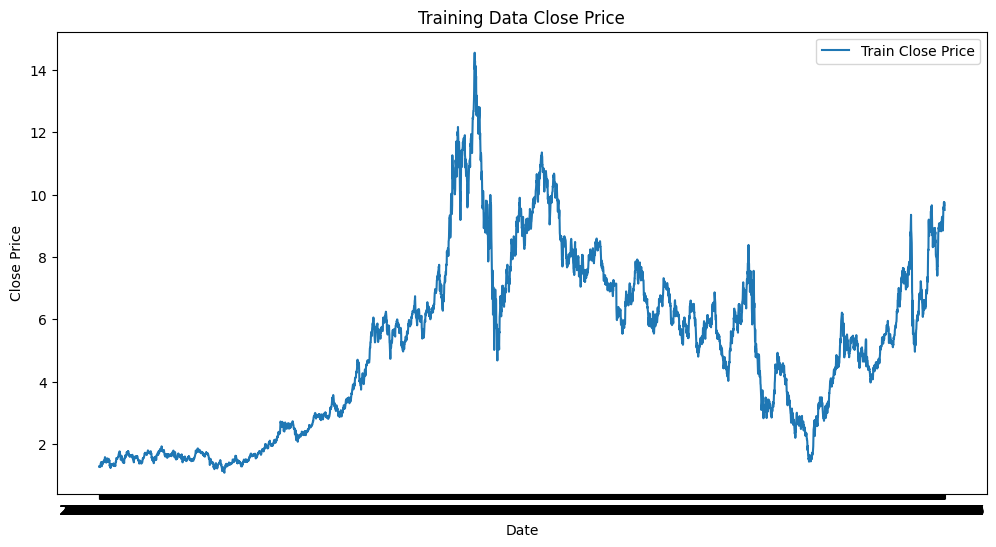

In [8]:
# Plot dos valores de fechamento para o treino
plt.figure(figsize=(12, 6))
plt.plot(train_data['Date'], train_data['Close'], label='Train Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Training Data Close Price')
plt.legend()
plt.show()

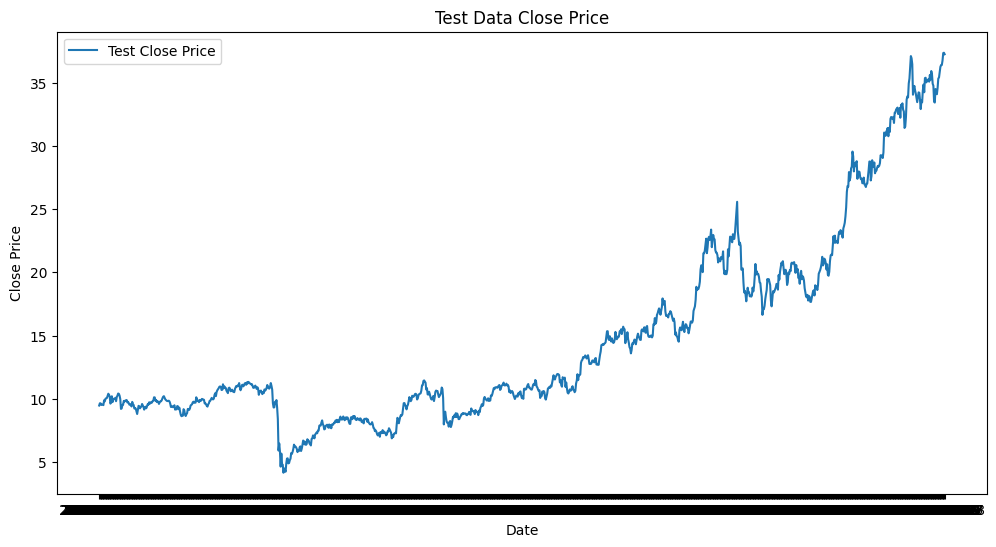

In [9]:
# Plot dos valores de fechamento para o teste
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['Close'], label='Test Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Test Data Close Price')
plt.legend()
plt.show()

# **3) Criando os dfs que serão usados nas NNs**

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Preparar dfs de treino
X_train = train_data.iloc[:, 5:].values  # Selecionando D-1 até D-15
y_train = train_data['Label'].values     # Selecionando a coluna label

# Preparar dfs de teste
X_test = test_data.iloc[:, 5:].values    # Selecionando D-1 até D-15
y_test = test_data['Label'].values       # Selecionando a coluna label

In [11]:
# Mapear labels: -1 para 0 (vender), 1 to 1 (comprar)
train_data['Label'] = train_data['Label'].apply(lambda x: 1 if x == 1 else 0)
test_data['Label'] = test_data['Label'].apply(lambda x: 1 if x == 1 else 0)

In [12]:
# Normalize the data
#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Normalizar os dados de fechamento - atingimos resultados melhores de acurácia usando esta metodologia
X_train = (X_train - X_train.min(axis=1, keepdims=True)) / (X_train.max(axis=1, keepdims=True) - X_train.min(axis=1, keepdims=True))
X_test = (X_test - X_test.min(axis=1, keepdims=True)) / (X_test.max(axis=1, keepdims=True) - X_test.min(axis=1, keepdims=True))

# Reshape dos dfs para os modelos CNN e RNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# **4**) Criando modelos CNN e RNN

In [13]:
#Criação do modelo CNN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM, Dropout, BatchNormalization, Bidirectional

# Função do modelo CNN
def create_cnn_model():
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(15, 1)),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(50, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Criando o modelo na variavel - CNN
cnn_model = create_cnn_model()
cnn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 13, 64)            256       
                                                                 
 batch_normalization (Batch  (None, 13, 64)            256       
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 6, 64)             0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 384)               0         
                                                                 
 dense (Dense)               (None, 50)                19250     
                                                                 
 dropout (Dropout)           (None, 50)                0

In [14]:
# Função do modelo RNN
def create_rnn_model():
    model = Sequential([
        Bidirectional(LSTM(50, return_sequences=True, input_shape=(15, 1))),
        Dropout(0.2),
        Bidirectional(LSTM(50)),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Criando o modelo na variavel
rnn_model = create_rnn_model()

In [15]:
# Treinando o modelo CNN
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Definindo o fator learning rate scheduler - proposto como melhoria pelo ChatGPT
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)

# Treinando o modelo com o learning rate scheduler
cnn_history = cnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[lr_scheduler])

Epoch 1/50
121/121 [==============================] - 2s 6ms/step - loss: -18.5309 - accuracy: 0.2829 - val_loss: -13.6002 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/50
121/121 [==============================] - 1s 5ms/step - loss: -201.1414 - accuracy: 0.2470 - val_loss: -167.3719 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/50
121/121 [==============================] - 1s 6ms/step - loss: -769.6215 - accuracy: 0.2233 - val_loss: -802.1359 - val_accuracy: 0.0956 - lr: 0.0010
Epoch 4/50
121/121 [==============================] - 1s 5ms/step - loss: -1937.0487 - accuracy: 0.2070 - val_loss: -2280.9734 - val_accuracy: 0.1518 - lr: 0.0010
Epoch 5/50
121/121 [==============================] - 1s 7ms/step - loss: -3861.9841 - accuracy: 0.1859 - val_loss: -4825.2593 - val_accuracy: 0.1788 - lr: 0.0010
Epoch 6/50
121/121 [==============================] - 1s 5ms/step - loss: -6732.8901 - accuracy: 0.1771 - val_loss: -8019.3804 - val_accuracy: 0.2089 - lr: 0.0010
Epoch 7/50
121/121 [==

In [16]:
# Treinando o modeo RNN com o learning rate scheduler
rnn_history = rnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[lr_scheduler])

Epoch 1/50
121/121 [==============================] - 16s 62ms/step - loss: -4.8674 - accuracy: 0.1495 - val_loss: -9.0060 - val_accuracy: 0.3358 - lr: 0.0010
Epoch 2/50
121/121 [==============================] - 4s 32ms/step - loss: -12.6287 - accuracy: 0.2738 - val_loss: -15.6037 - val_accuracy: 0.4231 - lr: 0.0010
Epoch 3/50
121/121 [==============================] - 4s 34ms/step - loss: -19.0530 - accuracy: 0.3042 - val_loss: -21.5618 - val_accuracy: 0.3181 - lr: 0.0010
Epoch 4/50
121/121 [==============================] - 5s 39ms/step - loss: -25.0772 - accuracy: 0.3050 - val_loss: -27.6838 - val_accuracy: 0.3909 - lr: 0.0010
Epoch 5/50
121/121 [==============================] - 4s 31ms/step - loss: -30.7769 - accuracy: 0.3055 - val_loss: -32.8752 - val_accuracy: 0.3264 - lr: 0.0010
Epoch 6/50
121/121 [==============================] - 4s 31ms/step - loss: -36.1924 - accuracy: 0.3024 - val_loss: -38.5242 - val_accuracy: 0.3576 - lr: 0.0010
Epoch 7/50
121/121 [=====================

# **5) Avaliação de resultados dos modelos CNN e RNN**

In [17]:
# Avaliando o modelo CNN

from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Métricas de avaliação
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test)
y_pred_cnn = (cnn_model.predict(X_test) > 0.5).astype("int32")
cnn_precision = precision_score(y_test, y_pred_cnn)
cnn_recall = recall_score(y_test, y_pred_cnn)
cnn_conf_matrix = confusion_matrix(y_test, y_pred_cnn)

38/38 [==============================] - 0s 4ms/step


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [18]:
# Printando perda, acurácia, precisão, recall
print(f"CNN Model")
print(f"Loss: {cnn_loss:.4f}")
print(f"Accuracy: {cnn_accuracy:.4f}")
print(f"Precision: {cnn_precision:.4f}")
print(f"Recall: {cnn_recall:.4f}")

CNN Model
Loss: -1392964.6250
Accuracy: 0.1239


NameError: name 'cnn_precision' is not defined

In [19]:
# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cnn_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('CNN Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

NameError: name 'cnn_conf_matrix' is not defined

<Figure size 800x600 with 0 Axes>

In [20]:
# Avaliando o modelo RNN
# Métricas de avaliação
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test, y_test)
y_pred_rnn = (rnn_model.predict(X_test) > 0.5).astype("int32")
rnn_precision = precision_score(y_test, y_pred_rnn)
rnn_recall = recall_score(y_test, y_pred_rnn)
rnn_conf_matrix = confusion_matrix(y_test, y_pred_rnn)

38/38 [==============================] - 2s 8ms/step


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [21]:
# Printando perda, acurácia, precisão, recall
print(f"RNN Model")
print(f"Loss: {rnn_loss:.4f}")
print(f"Accuracy: {rnn_accuracy:.4f}")
print(f"Precision: {rnn_precision:.4f}")
print(f"Recall: {rnn_recall:.4f}")

RNN Model
Loss: -211.4922
Accuracy: 0.3799


NameError: name 'rnn_precision' is not defined

In [22]:
# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(rnn_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('RNN Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

NameError: name 'rnn_conf_matrix' is not defined

<Figure size 800x600 with 0 Axes>

# **6) Criando o backtest para checagem do valor agregado do modelo**

In [23]:
# Vamos criar a função de backtest. Basicamente vamos analisar se vamos comprar ou vender e ao fim, verificar o valor final que temos
def backtest(model, df_prices, window_size, initial_balance):
    # Extrair e normalizar as sequencias
    sequences = []
    for i in range(len(df_prices) - window_size):
        sequences.append(df_prices['Close'].values[i:i + window_size])

    sequences = np.array(sequences)
    sequences = (sequences - sequences.min(axis=1, keepdims=True)) / (sequences.max(axis=1, keepdims=True) - sequences.min(axis=1, keepdims=True))
    sequences = np.expand_dims(sequences, axis=2)

    # Fazer as predições baseadas no modelo que vamos escolher (CNN ou RNN)
    predictions = (model.predict(sequences) > 0.5).astype("int32")

    # Inicializar o montante
    balance = initial_balance
    shares = 0  # Numero inicial de ações

    # Simular as transações baseadas nas predições
    for i in range(len(predictions)):
        if predictions[i] == 1 and balance >= df_prices['Close'].values[i + window_size]:
            # Buy one share
            shares += 1
            balance -= df_prices['Close'].values[i + window_size]
        elif predictions[i] == 0 and shares > 0:
            # Sell one share
            shares -= 1
            balance += df_prices['Close'].values[i + window_size]

    # Calcular o valor final do portfolio
    final_balance = balance + shares * df_prices['Close'].values[-1]

    # Calcular o retorno cumulativo
    cumulative_return = (final_balance - initial_balance) / initial_balance
    print(f"Cumulative return from backtest: {cumulative_return:.4f}")

    return final_balance, cumulative_return

In [24]:
# Inputs do backtest

df_prices = test_data.copy()  # Assuming test_data is your dataframe containing the Close prices
window_size = 15
initial_balance = 10000

In [25]:
# Testando para o modelo CNN

import numpy as np
final_balance_cnn, cumulative_return_cnn = backtest(cnn_model, df_prices, window_size, initial_balance)
print(f"Final balance after backtesting with CNN model: ${final_balance_cnn:.2f}")

38/38 [==============================] - 0s 2ms/step
Cumulative return from backtest: 0.0012
Final balance after backtesting with CNN model: $10012.35


In [26]:
# Testando para o modelo RNN

final_balance_rnn, cumulative_return_rnn = backtest(rnn_model, df_prices, window_size, initial_balance)
print(f"Final balance after backtesting with improved RNN model: ${final_balance_rnn:.2f}")

38/38 [==============================] - 0s 10ms/step
Cumulative return from backtest: 0.0141
Final balance after backtesting with improved RNN model: $10141.29


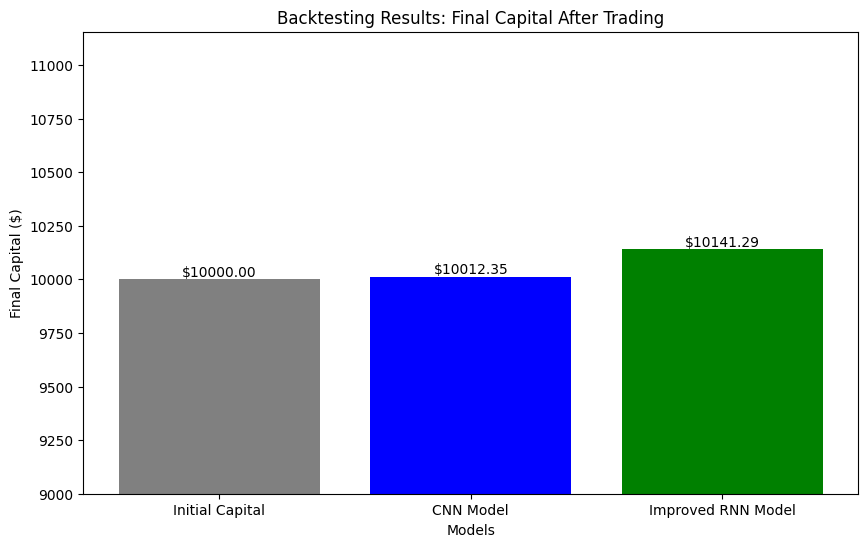

In [27]:
# Plots comparando o resultado final, comparando os dois modelos
models = ['Initial Capital', 'CNN Model', 'Improved RNN Model']
final_capitals = [initial_balance, final_balance_cnn, final_balance_rnn]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, final_capitals, color=['gray', 'blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Final Capital ($)')
plt.title('Backtesting Results: Final Capital After Trading')

# Adicionar labels nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'${yval:.2f}', ha='center', va='bottom')

# Ajustando o eixo Y
plt.ylim(min(final_capitals) * 0.9, max(final_capitals) * 1.1)

plt.show()

# **7) Função que concatena as 6 sessões anterios em uma só (para efeito de praticidade ao comparar o resultado em cada ação)**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Funçao do modelo CNN
def create_cnn_model():
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(15, 1)),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(50, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Funçao do modelo RNN
def create_rnn_model():
    model = Sequential([
        Bidirectional(LSTM(50, return_sequences=True, input_shape=(15, 1))),
        Dropout(0.2),
        Bidirectional(LSTM(50)),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Normalização dos dados usados
def normalize_data(X):
    return (X - X.min(axis=1, keepdims=True)) / (X.max(axis=1, keepdims=True) - X.min(axis=1, keepdims=True))

# Preparação de treino e teste
def prepare_data(train_data, test_data):
    # Map labels: -1 to 0 (sell), 1 to 1 (buy)
    train_data['Label'] = train_data['Label'].apply(lambda x: 1 if x == 1 else 0)
    test_data['Label'] = test_data['Label'].apply(lambda x: 1 if x == 1 else 0)

    X_train = train_data.iloc[:, 5:].values  # Selecionando D-1 até D-15
    y_train = train_data['Label'].values     # Selecionando o Label
    X_test = test_data.iloc[:, 5:].values    # Selecionando D-1 até D-15
    y_test = test_data['Label'].values       # Selecionando o Label

    # Normalizando
    X_train = normalize_data(X_train)
    X_test = normalize_data(X_test)

    # Reshape necessário para usar no RNN e CNN
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    return X_train, y_train, X_test, y_test

# Função de avaliação dos modelos
def evaluate_model(model, X_test, y_test, model_name):
    loss, accuracy = model.evaluate(X_test, y_test)
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"{model_name} Model")
    print(f"Loss: {loss:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

    return loss, accuracy, precision, recall, conf_matrix

# Função do backtest
def backtest(model, df_prices, window_size, initial_balance):
    # Extrair e normalizar sequencias utilizadas
    sequences = []
    for i in range(len(df_prices) - window_size):
        sequences.append(df_prices['Close'].values[i:i + window_size])

    sequences = np.array(sequences)
    sequences = normalize_data(sequences)
    sequences = np.expand_dims(sequences, axis=2)

    # Fazer as predições de acordo com os modelos (CNN / RNN)
    predictions = (model.predict(sequences) > 0.5).astype("int32")

    # Inicializar variáveis
    balance = initial_balance
    shares = 0  # Número inicial de ações

    # Simular as transações baseado na predição
    for i in range(len(predictions)):
        if predictions[i] == 1 and balance >= df_prices['Close'].values[i + window_size]:
            # Comprar uma ação
            shares += 1
            balance -= df_prices['Close'].values[i + window_size]
        elif predictions[i] == 0 and shares > 0:
            # Vender uma ação
            shares -= 1
            balance += df_prices['Close'].values[i + window_size]

    # Calculo do valor final do portfolio
    final_balance = balance + shares * df_prices['Close'].values[-1]

    # Calculo do valor cumulativo final
    cumulative_return = (final_balance - initial_balance) / initial_balance
    print(f"Cumulative return from backtest: {cumulative_return:.4f}")

    return final_balance, cumulative_return

# Função para avaliar os modelos de uma só vez
def train_and_evaluate_datasets(datasets, initial_balance=10000, window_size=15):
    results = []

    for i, (train_data, test_data) in enumerate(datasets):
        print(f"Dataset {i+1}")

        # Preparar dados
        X_train, y_train, X_test, y_test = prepare_data(train_data, test_data)

        # Criar modelos
        cnn_model = create_cnn_model()
        rnn_model = create_rnn_model()

        # Definir o learning rate scheduler
        lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)

        # Treinar o CNN
        cnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[lr_scheduler])

        # Treinar o RNN
        rnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[lr_scheduler])

        # Avaliar modelos
        cnn_metrics = evaluate_model(cnn_model, X_test, y_test, "CNN")
        rnn_metrics = evaluate_model(rnn_model, X_test, y_test, "RNN")

        # Backtest
        df_prices = test_data.copy()
        final_balance_cnn, cumulative_return_cnn = backtest(cnn_model, df_prices, window_size, initial_balance)
        final_balance_rnn, cumulative_return_rnn = backtest(rnn_model, df_prices, window_size, initial_balance)

        # Guardar resultados
        results.append({
            'dataset': i+1,
            'cnn_metrics': cnn_metrics,
            'rnn_metrics': rnn_metrics,
            'final_balance_cnn': final_balance_cnn,
            'cumulative_return_cnn': cumulative_return_cnn,
            'final_balance_rnn': final_balance_rnn,
            'cumulative_return_rnn': cumulative_return_rnn
        })

    return results

# **8) Resultado BB**

In [ ]:
# Upload do treino
uploaded = files.upload()

# Gravando no df
train_data = pd.read_csv('treino.csv')

In [ ]:
# Upload do teste
uploaded = files.upload()

# Gravando no df
test_data = pd.read_csv('teste.csv')

Saving teste.csv to teste (1).csv


In [ ]:
# Rodando a função da sessão 7
datasets = [(train_data, test_data)]
results = train_and_evaluate_datasets(datasets)

Dataset 1
Epoch 1/50
121/121 [==============================] - 3s 5ms/step - loss: 0.3222 - accuracy: 0.8591 - val_loss: 0.5515 - val_accuracy: 0.9023 - lr: 0.0010
Epoch 2/50
121/121 [==============================] - 0s 4ms/step - loss: 0.2587 - accuracy: 0.8877 - val_loss: 0.4427 - val_accuracy: 0.9012 - lr: 0.0010
Epoch 3/50
121/121 [==============================] - 0s 3ms/step - loss: 0.2580 - accuracy: 0.8892 - val_loss: 0.3313 - val_accuracy: 0.9064 - lr: 0.0010
Epoch 4/50
121/121 [==============================] - 0s 3ms/step - loss: 0.2467 - accuracy: 0.8926 - val_loss: 0.2714 - val_accuracy: 0.9116 - lr: 0.0010
Epoch 5/50
121/121 [==============================] - 0s 3ms/step - loss: 0.2466 - accuracy: 0.8968 - val_loss: 0.2399 - val_accuracy: 0.9148 - lr: 0.0010
Epoch 6/50
121/121 [==============================] - 0s 3ms/step - loss: 0.2424 - accuracy: 0.8918 - val_loss: 0.2348 - val_accuracy: 0.9148 - lr: 0.0010
Epoch 7/50
121/121 [==============================] - 0s 3ms

In [ ]:
# Pegar valores importantes de resultado
cnn_losses = [round(result['cnn_metrics'][0], 4) for result in results]
cnn_accuracies = [round(result['cnn_metrics'][1], 4) for result in results]
cnn_precisions = [round(result['cnn_metrics'][2], 4) for result in results]
cnn_recalls = [round(result['cnn_metrics'][3], 4) for result in results]
cnn_confusion_matrices = [result['cnn_metrics'][4] for result in results]

rnn_losses = [round(result['rnn_metrics'][0], 4) for result in results]
rnn_accuracies = [round(result['rnn_metrics'][1], 4) for result in results]
rnn_precisions = [round(result['rnn_metrics'][2], 4) for result in results]
rnn_recalls = [round(result['rnn_metrics'][3], 4) for result in results]
rnn_confusion_matrices = [result['rnn_metrics'][4] for result in results]

final_balances_cnn = [round(result['final_balance_cnn'], 4) for result in results]
cumulative_returns_cnn = [round(result['cumulative_return_cnn'], 4) for result in results]

final_balances_rnn = [round(result['final_balance_rnn'], 4) for result in results]
cumulative_returns_rnn = [round(result['cumulative_return_rnn'], 4) for result in results]

# Criar tabela comparando Loss, Accuracy, Precision, Recall
comparison_data = {
    'Metric': ['Loss', 'Accuracy', 'Precision', 'Recall'],
    'CNN': [cnn_losses[0], cnn_accuracies[0], cnn_precisions[0], cnn_recalls[0]],
    'RNN': [rnn_losses[0], rnn_accuracies[0], rnn_precisions[0], rnn_recalls[0]]
}

for i in range(1, len(results)):
    comparison_data['CNN'].extend([cnn_losses[i], cnn_accuracies[i], cnn_precisions[i], cnn_recalls[i]])
    comparison_data['RNN'].extend([rnn_losses[i], rnn_accuracies[i], rnn_precisions[i], rnn_recalls[i]])

comparison_table = pd.DataFrame(comparison_data)
print(comparison_table)

      Metric     CNN     RNN
0       Loss  0.3509  0.3354
1   Accuracy  0.8529  0.8645
2  Precision  0.8630  0.8614
3     Recall  0.8505  0.8794


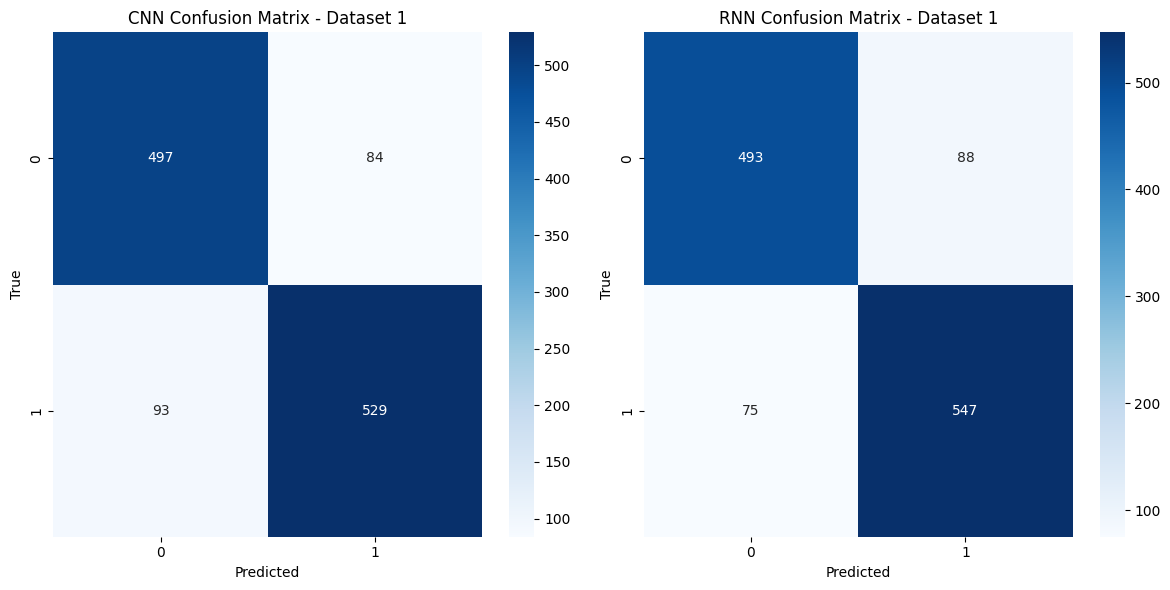

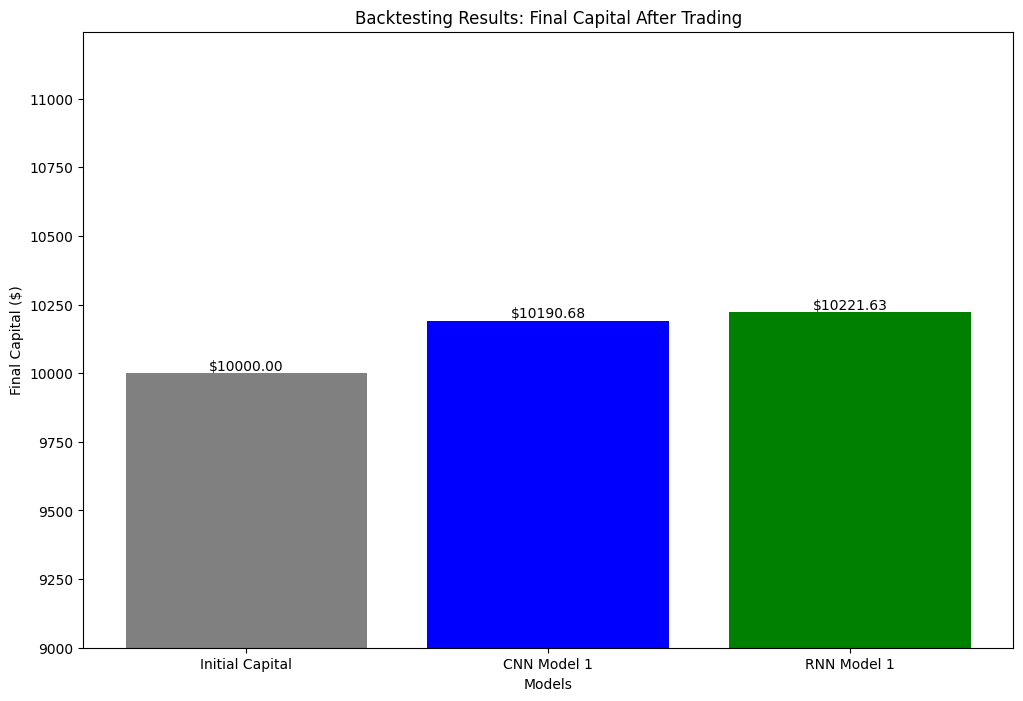

In [ ]:
# Plot da matriz de confusão
for i, (cnn_cm, rnn_cm) in enumerate(zip(cnn_confusion_matrices, rnn_confusion_matrices)):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.heatmap(cnn_cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'CNN Confusion Matrix - Dataset {i+1}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    plt.subplot(1, 2, 2)
    sns.heatmap(rnn_cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'RNN Confusion Matrix - Dataset {i+1}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    plt.tight_layout()
    plt.show()

# Plot do resultado final do backtest
models = ['Initial Capital']
for i in range(len(datasets)):
    models.append(f'CNN Model {i+1}')
    models.append(f'RNN Model {i+1}')

final_capitals = [10000]  # Initial balance
for result in results:
    final_capitals.append(result['final_balance_cnn'])
    final_capitals.append(result['final_balance_rnn'])

plt.figure(figsize=(12, 8))
bars = plt.bar(models, final_capitals, color=['gray'] + ['blue', 'green'] * len(datasets))
plt.xlabel('Models')
plt.ylabel('Final Capital ($)')
plt.title('Backtesting Results: Final Capital After Trading')

# Adicionar labels nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'${yval:.2f}', ha='center', va='bottom')

# Ajustar eixo Y
plt.ylim(min(final_capitals) * 0.9, max(final_capitals) * 1.1)

plt.show()

# **9) Resultado CSN**

In [ ]:
# Upload do treino
uploaded = files.upload()

# Gravando no df
train_data = pd.read_csv('treino.csv')

Saving treino.csv to treino (2).csv


In [ ]:
# Upload do teste
uploaded = files.upload()

# Gravando no df
test_data = pd.read_csv('teste.csv')

Saving teste.csv to teste (2).csv


In [ ]:
# Rodando a função da sessão 7
datasets = [(train_data, test_data)]
results = train_and_evaluate_datasets(datasets)

Dataset 1
Epoch 1/50
121/121 [==============================] - 2s 8ms/step - loss: 0.3256 - accuracy: 0.8570 - val_loss: 0.5572 - val_accuracy: 0.8992 - lr: 0.0010
Epoch 2/50
121/121 [==============================] - 1s 6ms/step - loss: 0.2606 - accuracy: 0.8913 - val_loss: 0.4504 - val_accuracy: 0.9106 - lr: 0.0010
Epoch 3/50
121/121 [==============================] - 1s 5ms/step - loss: 0.2543 - accuracy: 0.8921 - val_loss: 0.3249 - val_accuracy: 0.9148 - lr: 0.0010
Epoch 4/50
121/121 [==============================] - 1s 6ms/step - loss: 0.2470 - accuracy: 0.8934 - val_loss: 0.2767 - val_accuracy: 0.9168 - lr: 0.0010
Epoch 5/50
121/121 [==============================] - 1s 5ms/step - loss: 0.2454 - accuracy: 0.8934 - val_loss: 0.2259 - val_accuracy: 0.9168 - lr: 0.0010
Epoch 6/50
121/121 [==============================] - 0s 4ms/step - loss: 0.2433 - accuracy: 0.8929 - val_loss: 0.2185 - val_accuracy: 0.9168 - lr: 0.0010
Epoch 7/50
121/121 [==============================] - 1s 7ms

In [ ]:
# Pegar valores importantes de resultado
cnn_losses = [round(result['cnn_metrics'][0], 4) for result in results]
cnn_accuracies = [round(result['cnn_metrics'][1], 4) for result in results]
cnn_precisions = [round(result['cnn_metrics'][2], 4) for result in results]
cnn_recalls = [round(result['cnn_metrics'][3], 4) for result in results]
cnn_confusion_matrices = [result['cnn_metrics'][4] for result in results]

rnn_losses = [round(result['rnn_metrics'][0], 4) for result in results]
rnn_accuracies = [round(result['rnn_metrics'][1], 4) for result in results]
rnn_precisions = [round(result['rnn_metrics'][2], 4) for result in results]
rnn_recalls = [round(result['rnn_metrics'][3], 4) for result in results]
rnn_confusion_matrices = [result['rnn_metrics'][4] for result in results]

final_balances_cnn = [round(result['final_balance_cnn'], 4) for result in results]
cumulative_returns_cnn = [round(result['cumulative_return_cnn'], 4) for result in results]

final_balances_rnn = [round(result['final_balance_rnn'], 4) for result in results]
cumulative_returns_rnn = [round(result['cumulative_return_rnn'], 4) for result in results]

# Criar tabela comparando Loss, Accuracy, Precision, Recall
comparison_data = {
    'Metric': ['Loss', 'Accuracy', 'Precision', 'Recall'],
    'CNN': [cnn_losses[0], cnn_accuracies[0], cnn_precisions[0], cnn_recalls[0]],
    'RNN': [rnn_losses[0], rnn_accuracies[0], rnn_precisions[0], rnn_recalls[0]]
}

for i in range(1, len(results)):
    comparison_data['CNN'].extend([cnn_losses[i], cnn_accuracies[i], cnn_precisions[i], cnn_recalls[i]])
    comparison_data['RNN'].extend([rnn_losses[i], rnn_accuracies[i], rnn_precisions[i], rnn_recalls[i]])

comparison_table = pd.DataFrame(comparison_data)
print(comparison_table)

      Metric     CNN     RNN
0       Loss  0.3505  0.3357
1   Accuracy  0.8595  0.8645
2  Precision  0.8567  0.8592
3     Recall  0.8746  0.8826


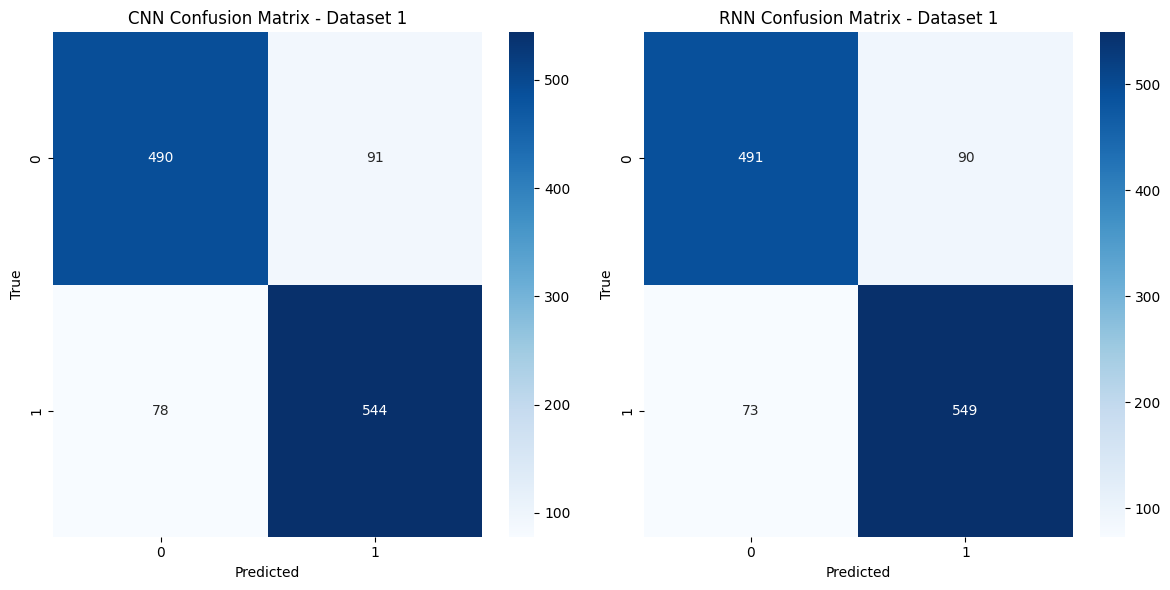

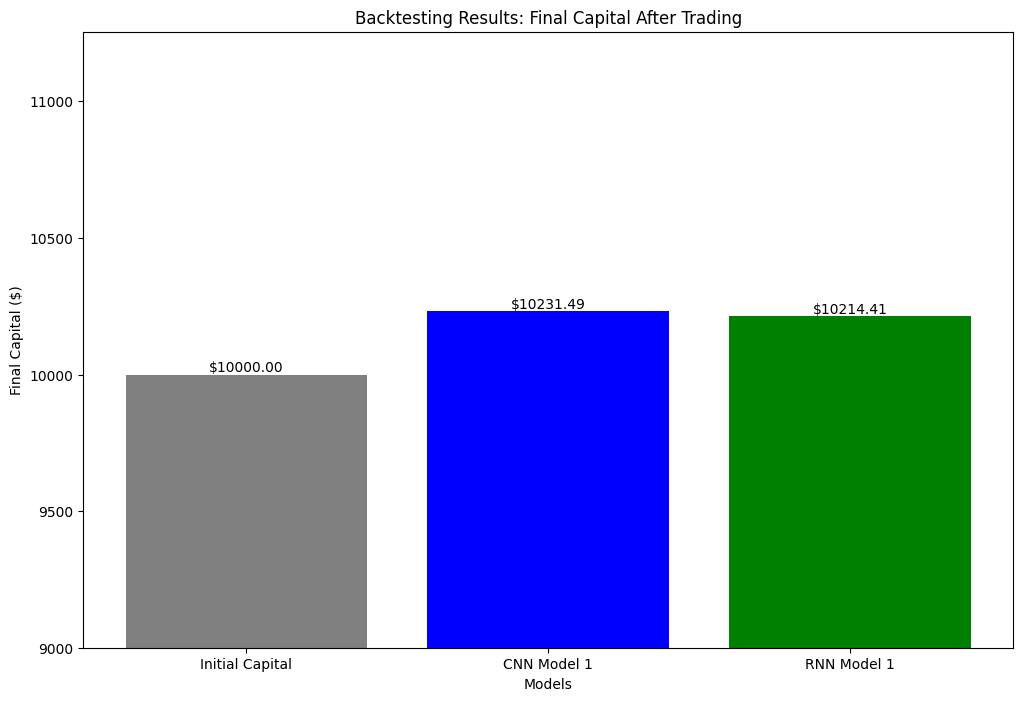

In [ ]:
# Plot da matriz de confusão
for i, (cnn_cm, rnn_cm) in enumerate(zip(cnn_confusion_matrices, rnn_confusion_matrices)):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.heatmap(cnn_cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'CNN Confusion Matrix - Dataset {i+1}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    plt.subplot(1, 2, 2)
    sns.heatmap(rnn_cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'RNN Confusion Matrix - Dataset {i+1}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    plt.tight_layout()
    plt.show()

# Plot do resultado final do backtest
models = ['Initial Capital']
for i in range(len(datasets)):
    models.append(f'CNN Model {i+1}')
    models.append(f'RNN Model {i+1}')

final_capitals = [10000]  # Initial balance
for result in results:
    final_capitals.append(result['final_balance_cnn'])
    final_capitals.append(result['final_balance_rnn'])

plt.figure(figsize=(12, 8))
bars = plt.bar(models, final_capitals, color=['gray'] + ['blue', 'green'] * len(datasets))
plt.xlabel('Models')
plt.ylabel('Final Capital ($)')
plt.title('Backtesting Results: Final Capital After Trading')

# Adicionar labels nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'${yval:.2f}', ha='center', va='bottom')

# Ajustar eixo Y
plt.ylim(min(final_capitals) * 0.9, max(final_capitals) * 1.1)

plt.show()

# **10) Resultado PETR**

In [ ]:
# Upload do treino
uploaded = files.upload()

# Gravando no df
train_data = pd.read_csv('treino.csv')

Saving treino.csv to treino (3).csv


In [ ]:
# Upload do teste
uploaded = files.upload()

# Gravando no df
test_data = pd.read_csv('teste.csv')

Saving teste.csv to teste (3).csv


In [ ]:
# Rodando a função da sessão 7
datasets = [(train_data, test_data)]
results = train_and_evaluate_datasets(datasets)

Dataset 1
Epoch 1/50
121/121 [==============================] - 2s 5ms/step - loss: 0.3257 - accuracy: 0.8651 - val_loss: 0.5730 - val_accuracy: 0.8805 - lr: 0.0010
Epoch 2/50
121/121 [==============================] - 0s 3ms/step - loss: 0.2669 - accuracy: 0.8827 - val_loss: 0.4505 - val_accuracy: 0.9106 - lr: 0.0010
Epoch 3/50
121/121 [==============================] - 0s 3ms/step - loss: 0.2602 - accuracy: 0.8913 - val_loss: 0.3506 - val_accuracy: 0.9168 - lr: 0.0010
Epoch 4/50
121/121 [==============================] - 0s 3ms/step - loss: 0.2476 - accuracy: 0.8963 - val_loss: 0.2555 - val_accuracy: 0.9168 - lr: 0.0010
Epoch 5/50
121/121 [==============================] - 0s 3ms/step - loss: 0.2477 - accuracy: 0.8929 - val_loss: 0.2354 - val_accuracy: 0.9168 - lr: 0.0010
Epoch 6/50
121/121 [==============================] - 0s 3ms/step - loss: 0.2421 - accuracy: 0.8968 - val_loss: 0.2294 - val_accuracy: 0.9210 - lr: 0.0010
Epoch 7/50
121/121 [==============================] - 0s 3ms

In [ ]:
# Pegar valores importantes de resultado
cnn_losses = [round(result['cnn_metrics'][0], 4) for result in results]
cnn_accuracies = [round(result['cnn_metrics'][1], 4) for result in results]
cnn_precisions = [round(result['cnn_metrics'][2], 4) for result in results]
cnn_recalls = [round(result['cnn_metrics'][3], 4) for result in results]
cnn_confusion_matrices = [result['cnn_metrics'][4] for result in results]

rnn_losses = [round(result['rnn_metrics'][0], 4) for result in results]
rnn_accuracies = [round(result['rnn_metrics'][1], 4) for result in results]
rnn_precisions = [round(result['rnn_metrics'][2], 4) for result in results]
rnn_recalls = [round(result['rnn_metrics'][3], 4) for result in results]
rnn_confusion_matrices = [result['rnn_metrics'][4] for result in results]

final_balances_cnn = [round(result['final_balance_cnn'], 4) for result in results]
cumulative_returns_cnn = [round(result['cumulative_return_cnn'], 4) for result in results]

final_balances_rnn = [round(result['final_balance_rnn'], 4) for result in results]
cumulative_returns_rnn = [round(result['cumulative_return_rnn'], 4) for result in results]

# Criar tabela comparando Loss, Accuracy, Precision, Recall
comparison_data = {
    'Metric': ['Loss', 'Accuracy', 'Precision', 'Recall'],
    'CNN': [cnn_losses[0], cnn_accuracies[0], cnn_precisions[0], cnn_recalls[0]],
    'RNN': [rnn_losses[0], rnn_accuracies[0], rnn_precisions[0], rnn_recalls[0]]
}

for i in range(1, len(results)):
    comparison_data['CNN'].extend([cnn_losses[i], cnn_accuracies[i], cnn_precisions[i], cnn_recalls[i]])
    comparison_data['RNN'].extend([rnn_losses[i], rnn_accuracies[i], rnn_precisions[i], rnn_recalls[i]])

comparison_table = pd.DataFrame(comparison_data)
print(comparison_table)

      Metric     CNN     RNN
0       Loss  0.3468  0.3364
1   Accuracy  0.8645  0.8653
2  Precision  0.8637  0.8594
3     Recall  0.8762  0.8842


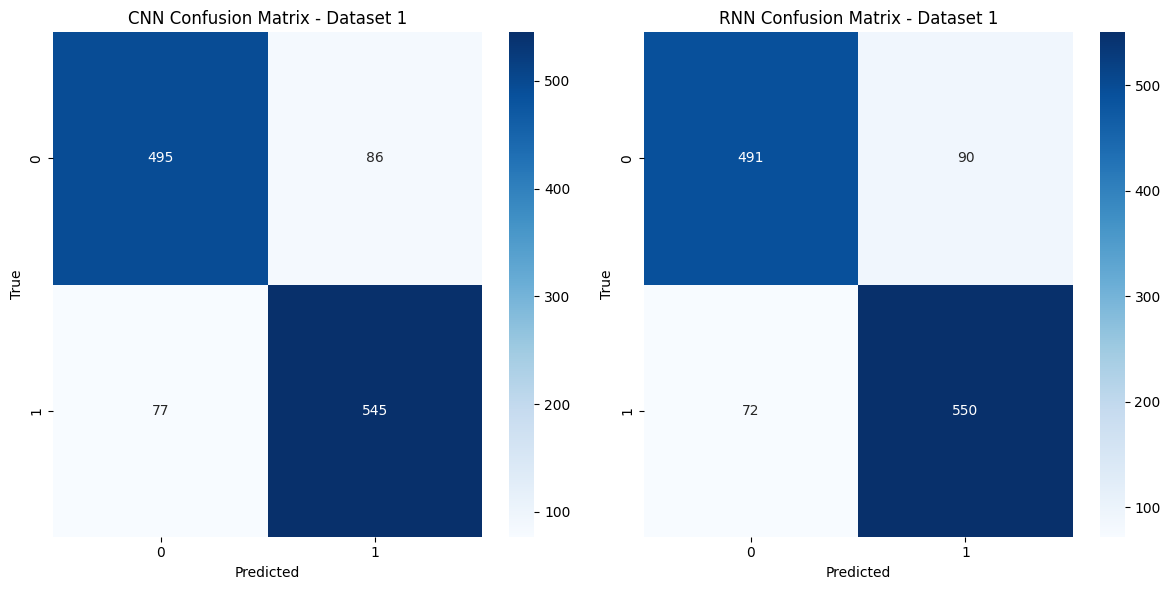

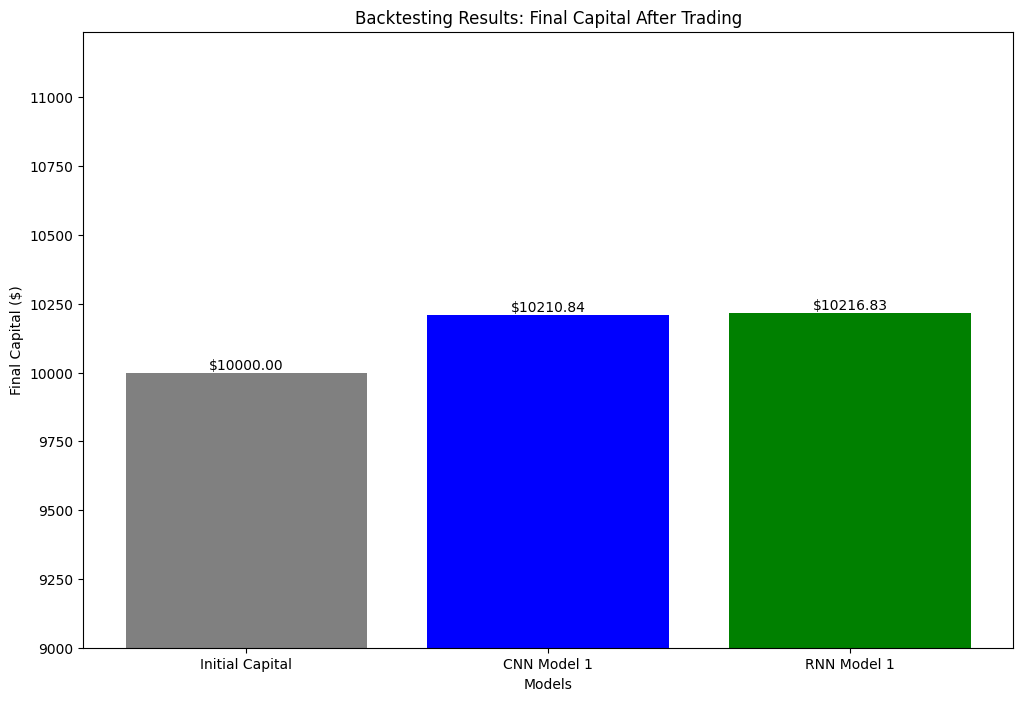

In [ ]:
# Plot da matriz de confusão
for i, (cnn_cm, rnn_cm) in enumerate(zip(cnn_confusion_matrices, rnn_confusion_matrices)):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.heatmap(cnn_cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'CNN Confusion Matrix - Dataset {i+1}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    plt.subplot(1, 2, 2)
    sns.heatmap(rnn_cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'RNN Confusion Matrix - Dataset {i+1}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    plt.tight_layout()
    plt.show()

# Plot do resultado final do backtest
models = ['Initial Capital']
for i in range(len(datasets)):
    models.append(f'CNN Model {i+1}')
    models.append(f'RNN Model {i+1}')

final_capitals = [10000]  # Initial balance
for result in results:
    final_capitals.append(result['final_balance_cnn'])
    final_capitals.append(result['final_balance_rnn'])

plt.figure(figsize=(12, 8))
bars = plt.bar(models, final_capitals, color=['gray'] + ['blue', 'green'] * len(datasets))
plt.xlabel('Models')
plt.ylabel('Final Capital ($)')
plt.title('Backtesting Results: Final Capital After Trading')

# Adicionar labels nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'${yval:.2f}', ha='center', va='bottom')

# Ajustar eixo Y
plt.ylim(min(final_capitals) * 0.9, max(final_capitals) * 1.1)

plt.show()

# **11) Resultado VALE**

In [ ]:
# Upload do treino
uploaded = files.upload()

# Gravando no df
train_data = pd.read_csv('treino.csv')

Saving treino.csv to treino (4).csv


In [ ]:
# Upload do teste
uploaded = files.upload()

# Gravando no df
test_data = pd.read_csv('teste.csv')

Saving teste.csv to teste (4).csv


In [ ]:
# Rodando a função da sessão 7
datasets = [(train_data, test_data)]
results = train_and_evaluate_datasets(datasets)

Dataset 1
Epoch 1/50
121/121 [==============================] - 3s 8ms/step - loss: 0.3353 - accuracy: 0.8518 - val_loss: 0.5758 - val_accuracy: 0.8056 - lr: 0.0010
Epoch 2/50
121/121 [==============================] - 1s 5ms/step - loss: 0.2660 - accuracy: 0.8851 - val_loss: 0.4602 - val_accuracy: 0.9200 - lr: 0.0010
Epoch 3/50
121/121 [==============================] - 1s 6ms/step - loss: 0.2536 - accuracy: 0.8861 - val_loss: 0.3450 - val_accuracy: 0.9158 - lr: 0.0010
Epoch 4/50
121/121 [==============================] - 1s 5ms/step - loss: 0.2498 - accuracy: 0.8890 - val_loss: 0.2580 - val_accuracy: 0.9200 - lr: 0.0010
Epoch 5/50
121/121 [==============================] - 0s 3ms/step - loss: 0.2472 - accuracy: 0.8916 - val_loss: 0.2316 - val_accuracy: 0.9200 - lr: 0.0010
Epoch 6/50
121/121 [==============================] - 0s 3ms/step - loss: 0.2393 - accuracy: 0.9004 - val_loss: 0.2379 - val_accuracy: 0.9158 - lr: 0.0010
Epoch 7/50
121/121 [==============================] - 0s 3ms

In [ ]:
# Pegar valores importantes de resultado
cnn_losses = [round(result['cnn_metrics'][0], 4) for result in results]
cnn_accuracies = [round(result['cnn_metrics'][1], 4) for result in results]
cnn_precisions = [round(result['cnn_metrics'][2], 4) for result in results]
cnn_recalls = [round(result['cnn_metrics'][3], 4) for result in results]
cnn_confusion_matrices = [result['cnn_metrics'][4] for result in results]

rnn_losses = [round(result['rnn_metrics'][0], 4) for result in results]
rnn_accuracies = [round(result['rnn_metrics'][1], 4) for result in results]
rnn_precisions = [round(result['rnn_metrics'][2], 4) for result in results]
rnn_recalls = [round(result['rnn_metrics'][3], 4) for result in results]
rnn_confusion_matrices = [result['rnn_metrics'][4] for result in results]

final_balances_cnn = [round(result['final_balance_cnn'], 4) for result in results]
cumulative_returns_cnn = [round(result['cumulative_return_cnn'], 4) for result in results]

final_balances_rnn = [round(result['final_balance_rnn'], 4) for result in results]
cumulative_returns_rnn = [round(result['cumulative_return_rnn'], 4) for result in results]

# Criar tabela comparando Loss, Accuracy, Precision, Recall
comparison_data = {
    'Metric': ['Loss', 'Accuracy', 'Precision', 'Recall'],
    'CNN': [cnn_losses[0], cnn_accuracies[0], cnn_precisions[0], cnn_recalls[0]],
    'RNN': [rnn_losses[0], rnn_accuracies[0], rnn_precisions[0], rnn_recalls[0]]
}

for i in range(1, len(results)):
    comparison_data['CNN'].extend([cnn_losses[i], cnn_accuracies[i], cnn_precisions[i], cnn_recalls[i]])
    comparison_data['RNN'].extend([rnn_losses[i], rnn_accuracies[i], rnn_precisions[i], rnn_recalls[i]])

comparison_table = pd.DataFrame(comparison_data)
print(comparison_table)

      Metric     CNN     RNN
0       Loss  0.3530  0.3357
1   Accuracy  0.8628  0.8662
2  Precision  0.8691  0.8596
3     Recall  0.8650  0.8859


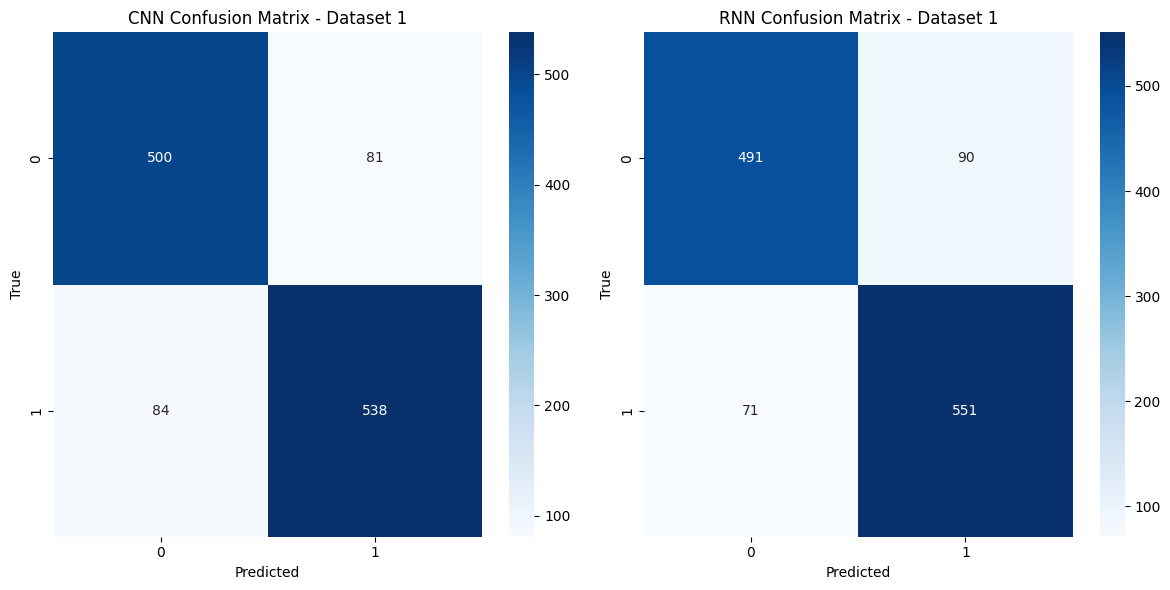

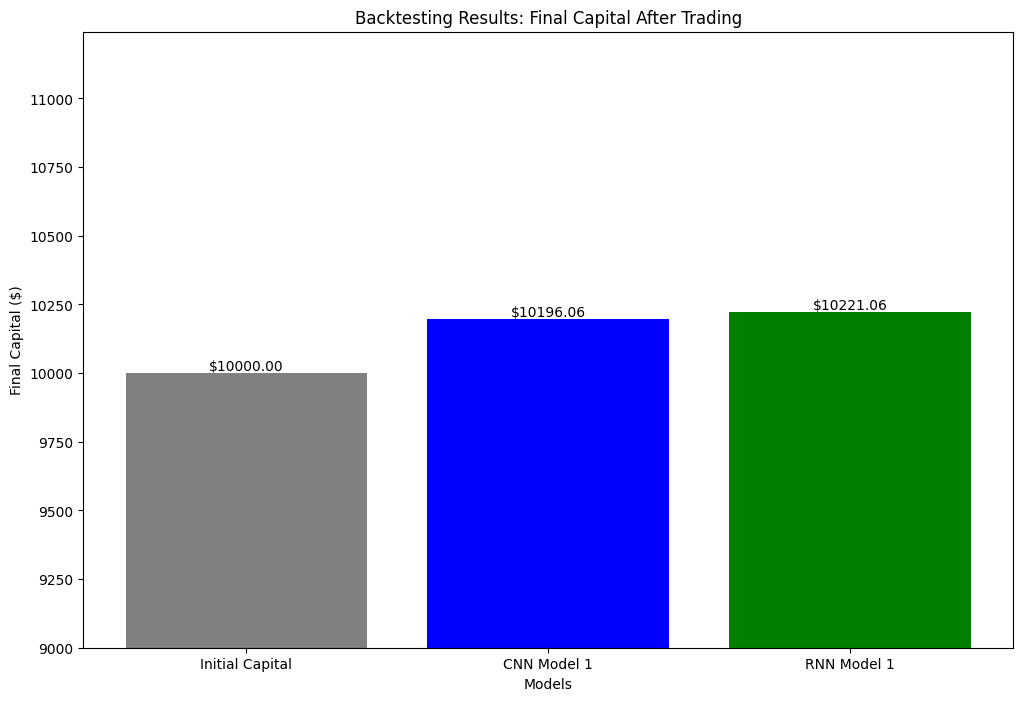

In [ ]:
# Plot da matriz de confusão
for i, (cnn_cm, rnn_cm) in enumerate(zip(cnn_confusion_matrices, rnn_confusion_matrices)):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.heatmap(cnn_cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'CNN Confusion Matrix - Dataset {i+1}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    plt.subplot(1, 2, 2)
    sns.heatmap(rnn_cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'RNN Confusion Matrix - Dataset {i+1}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    plt.tight_layout()
    plt.show()

# Plot do resultado final do backtest
models = ['Initial Capital']
for i in range(len(datasets)):
    models.append(f'CNN Model {i+1}')
    models.append(f'RNN Model {i+1}')

final_capitals = [10000]  # Initial balance
for result in results:
    final_capitals.append(result['final_balance_cnn'])
    final_capitals.append(result['final_balance_rnn'])

plt.figure(figsize=(12, 8))
bars = plt.bar(models, final_capitals, color=['gray'] + ['blue', 'green'] * len(datasets))
plt.xlabel('Models')
plt.ylabel('Final Capital ($)')
plt.title('Backtesting Results: Final Capital After Trading')

# Adicionar labels nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'${yval:.2f}', ha='center', va='bottom')

# Ajustar eixo Y
plt.ylim(min(final_capitals) * 0.9, max(final_capitals) * 1.1)

plt.show()